<a href="https://colab.research.google.com/github/Maiiiyasser/Image-Cartoonifying-/blob/main/Image_cartoonifying_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
import matplotlib.lines as mlines

Original Image


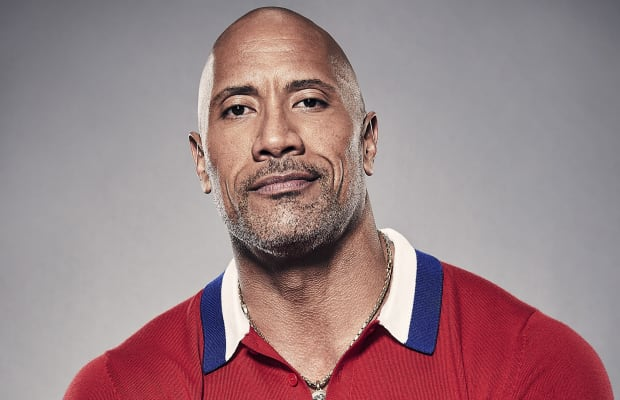

GrayScale Image


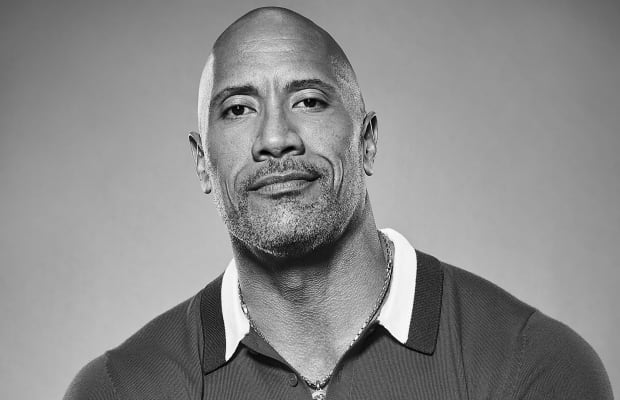

Image after applying Median Filter


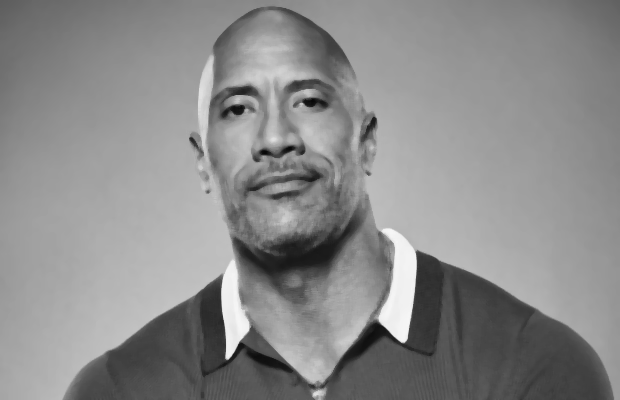

Image after applying Laplacian Filter


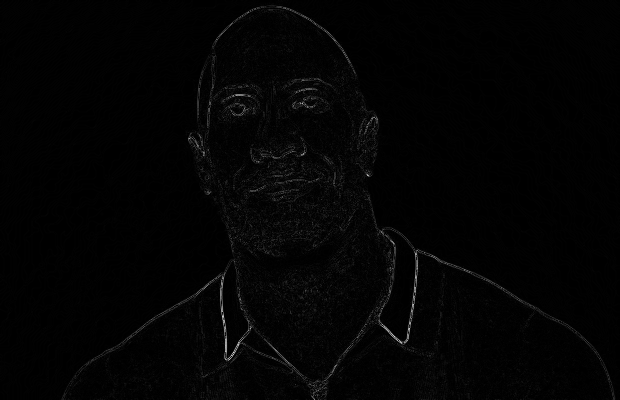

Image Threshhold


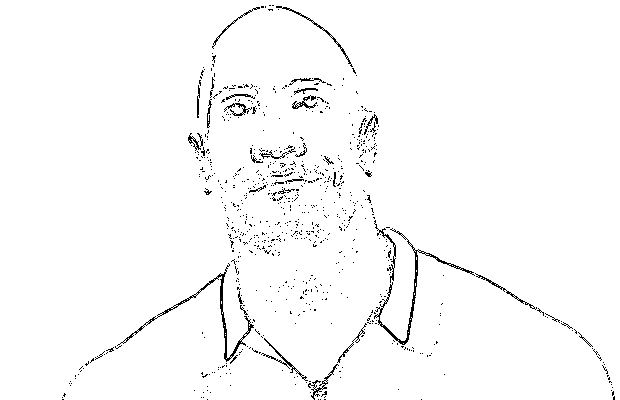

In [2]:
def get_image():
  img = cv2.imread('/content/the rock.png')
  print('Original Image')
  cv2_imshow(img)
  return img
img = get_image()
def noise_and_edge():
  gray_img = cv2.imread('/content/the rock.png', 0)
  print('GrayScale Image')
  cv2_imshow(gray_img)
  median = cv2.medianBlur(gray_img,5)
  print('Image after applying Median Filter')
  cv2_imshow(median)
  dst = cv2.Laplacian(median, cv2.CV_16S, 3)
  abs_dst = cv2.convertScaleAbs(dst)
  print('Image after applying Laplacian Filter')
  cv2_imshow(abs_dst)
  ret, thresh1 = cv2.threshold(abs_dst, 25, 255, cv2.THRESH_BINARY_INV)
  print('Image Threshhold')
  cv2_imshow(thresh1)
  return thresh1
mask = noise_and_edge()

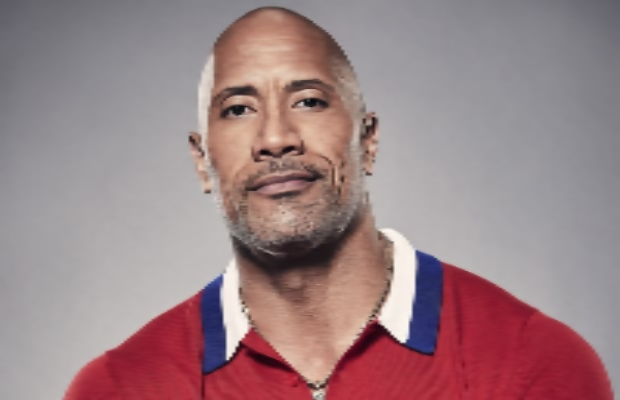

In [3]:
def bilateral():
  smallImg = cv2.resize(img, (int(img.shape[0]/2), int(img.shape[1]/2)))
  repetitions = 200
  for i in range(repetitions): 
    bilateral = cv2.bilateralFilter(smallImg, 3, 75, 75)
  bigImg = cv2.resize(bilateral,(int(smallImg.shape[0]*2),int(smallImg.shape[1]*2)))
  cv2_imshow(bigImg)
  return bigImg
image = bilateral()

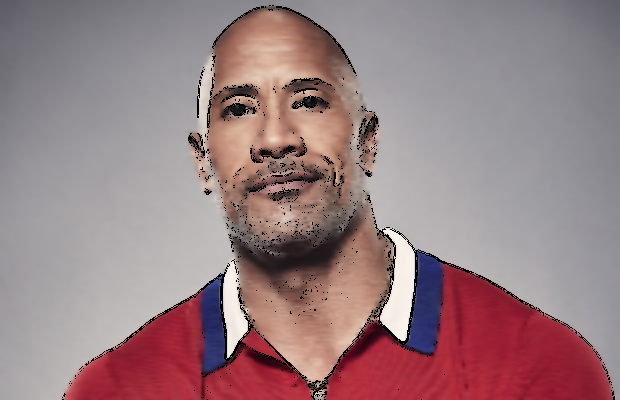

In [4]:
cartoonImage = cv2.bitwise_and(image, image, mask=mask)
cv2_imshow(cartoonImage)